![An Insight Into Cyber Bullying](https://raw.githubusercontent.com/Dutta-SD/Images_Unsplash/master/cyber_bullying_images/cYBER_bULLYING_bANNER.png)


# The Problem of Cyber Bullying
> With the rise of social media and degraded morality, cyber bullying has become a terrible menace of modern times. Social Media grants us anonymity, 
which leads some distorted minds to think they can get away with anything. So they pick out on people, befriend them and then shower them with hate.
    
> The problem may seem to some to be another sort of high school bully. But cyber bullying is done on social media where information is permanant. 
So this becomes a lifelong trauma for victims. Depression and Suicide are common after effects of this nemesis, but not much has been done to curb this menace.

In this notebook, Let us analyse the data we have and try to come up with a classifier which might help us to deter cyberbullying to some extent.

### WARNING : Strong Language Ahead!

# Importing the Data

In [1]:
# Imports for common tasks, models imported later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import gensim
from sklearn.metrics import fbeta_score
from imblearn.combine import SMOTETomek
import missingno as msn
from IPython.display import Image

%matplotlib inline

In [2]:
df = pd.read_csv("../input/cyberbully-data-formspring/formspring.csv")
# See first few rows
df.head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,<3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,(:,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,******************MEOWWW*************************,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN


# Exploration of the dataset

## 1. BarPlot of missing values

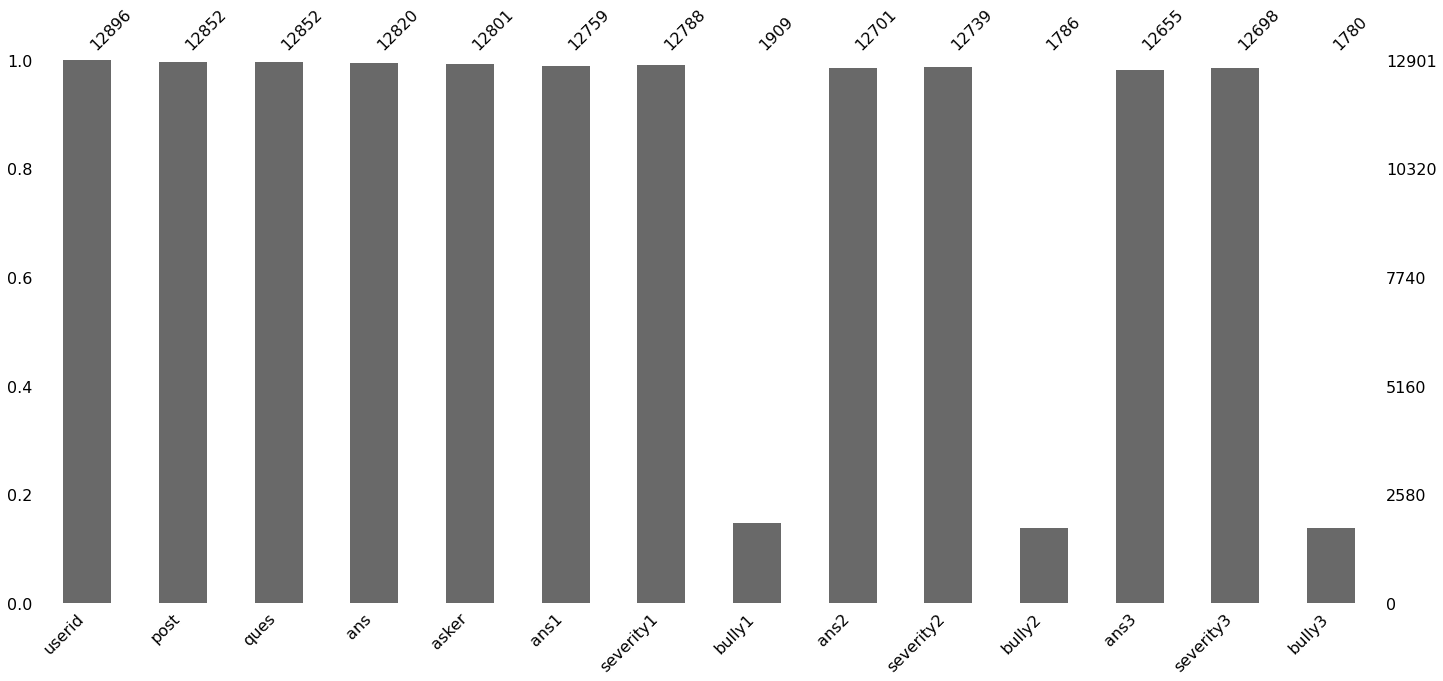

In [3]:
# missing values visualisation
msn.bar(df);

## Inference
Lots of Bully posts are missing values. Few rows are missing in 'ques', 'ans' columns. This might suggest that missing completely at random data. 

## 2. Distribution of userid column

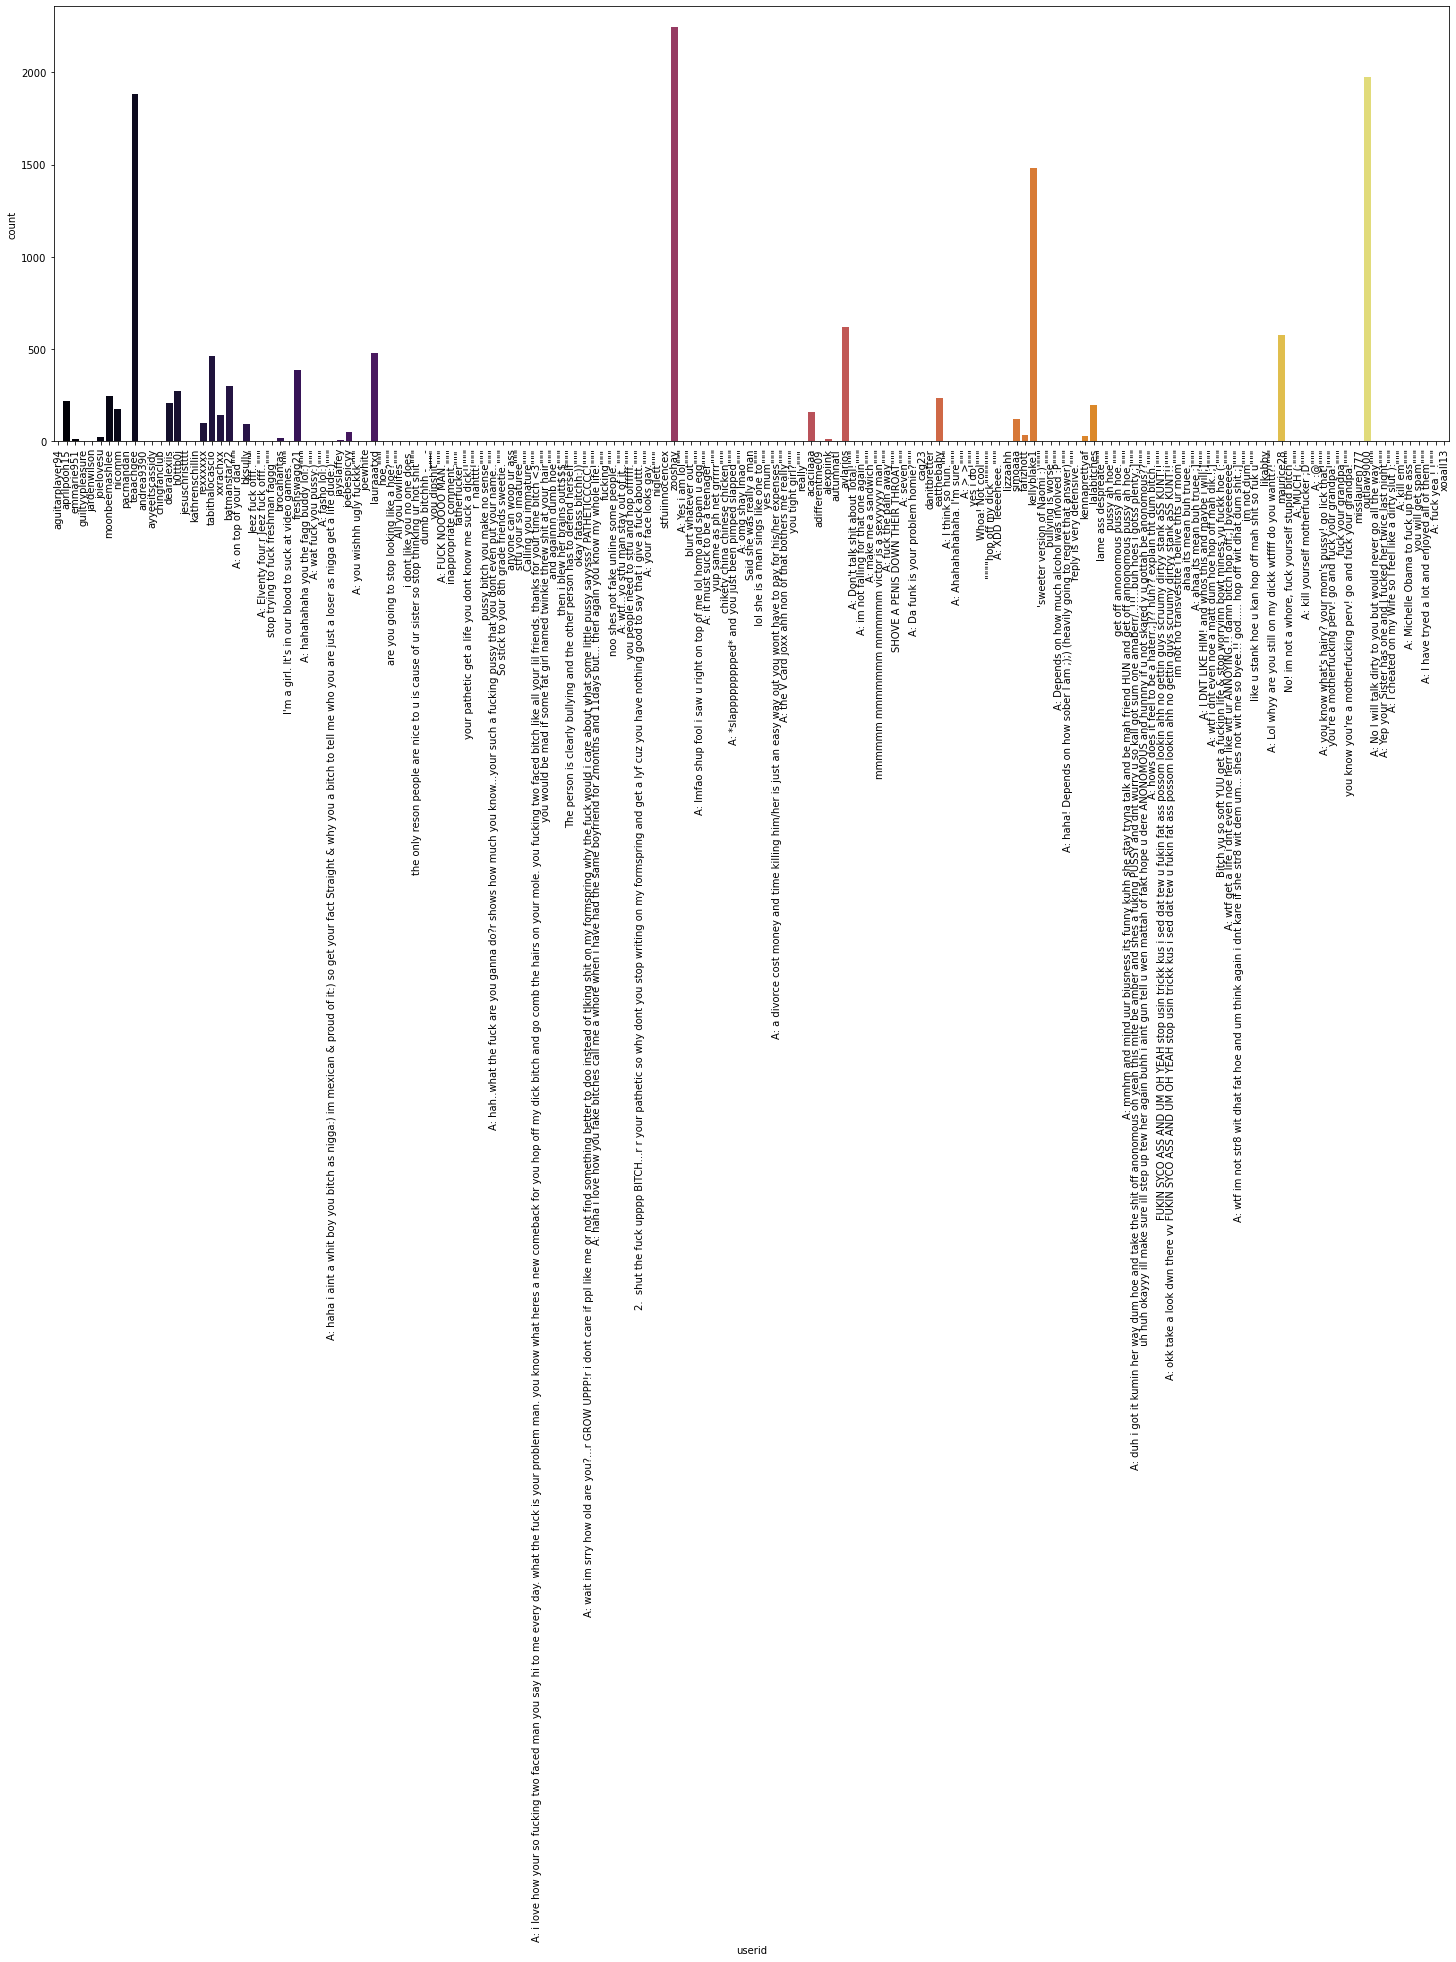

In [4]:
plt.figure(figsize = (25, 8))
sns.countplot(df['userid'], palette='inferno')
plt.xticks(rotation = 90);

## Inference
Some rows are corrupted whereby the answers have been filled wrong. We need to remove these(maybe?) or deal with them in some way(based on their counts).

## Visualisation of asker

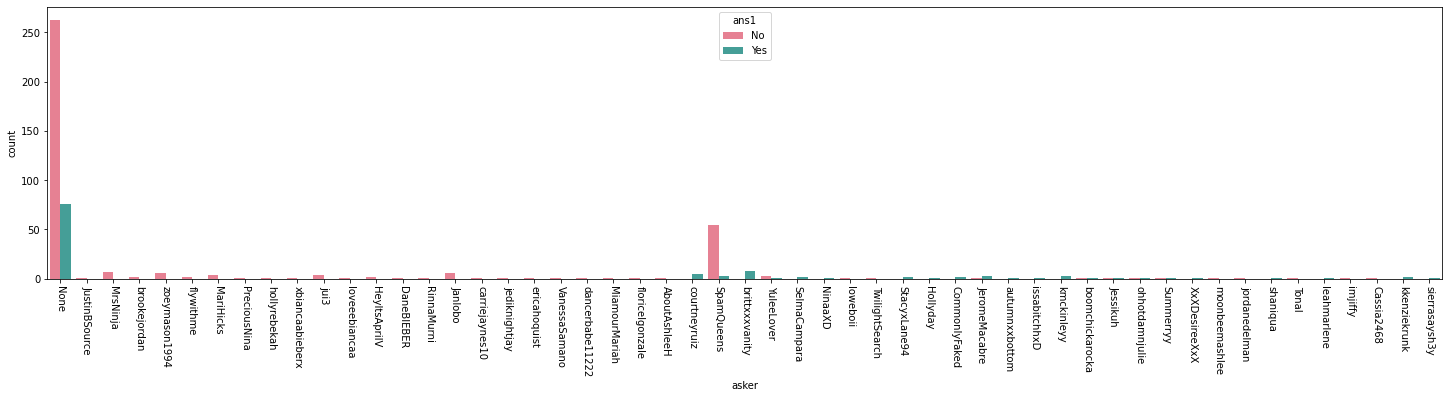

In [5]:
plt.figure(figsize = (25, 5))
sns.countplot(df['asker'][:500],
             palette = 'husl',
             hue = df['ans1'][:500]) # For convenience, see only first few rows
plt.xticks(rotation = -90);

## Inference
Lots of unique values. Might not be suitable for predicting purposes.

## WordClouds
Let us see the vocabulary of the bullies

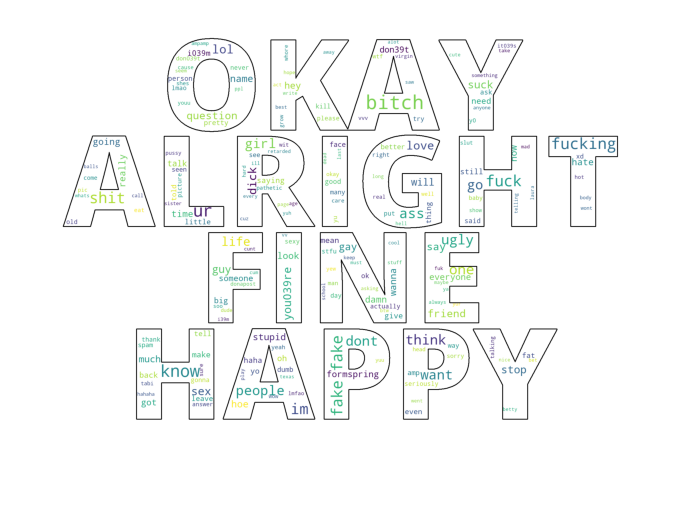

In [6]:
## Generate Word Clouds
bullyDF = df[df['ans1'] == 'Yes']
Words = [str(i) for i in bullyDF['ques']]
WordsString = (" ".join(Words)).lower()
WordsString = re.sub(r'[^\w\s]', '', WordsString)

# mask
img_url = 'https://raw.githubusercontent.com/Dutta-SD/Images_Unsplash/master/cyber_bullying_images/I%20AM%20FINE.png'
from urllib.request import urlopen
from PIL import Image
## make mask
img = urlopen(img_url)
mask = np.array(Image.open(img))

# WORDCLOUD
from wordcloud import WordCloud
wc = WordCloud(width = 1200, height = 1200,
              background_color = 'white',
              mask = mask,
              contour_width=3).generate(WordsString)
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wc); 
plt.axis("off");

# Stop saying it's okay when it is not!

# Insights about the data set
* userid - userid of a person giving the answer to a post
* post - The post and it's reply. Separated by Q: and A.
* ques and ans - The question and answer. The same information is available in post, so we drop post
* asker - id of the person asking the question.
* ans #, severity #, bully # - answer by mechanical turk, severity score assigned, bully word/phrase

In [7]:
# Posts with actual cyberbullying content
df[df['ans1'] == 'Yes'].head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
38,aprilpooh15,Q: Fuck Justin bieber. He&#039;s a fucking fag...,Fuck Justin bieber. He&#039;s a fucking fag,UM excuse yuh? HE IS NOT!! Ur a fuckin idiot!...,None,Yes,1,Ur a fuckin idiot!,Yes,5,Ur a fuckin idiot,Yes,5,Ur a fuckin idiot
56,aprilpooh15,Q: Hello bitch! How&#039;s ur day going? Good ...,Hello bitch! How&#039;s ur day going? Good I h...,Ohh heyy bitchh!!! its goin good..:D thx 4 askin,None,Yes,1,Hello bitch!,No,0,NaN,No,0,NaN
62,aprilpooh15,Q: Hey. Why you such a bitch?<br>A: Why thank ...,Hey. Why you such a bitch?,Why thank yuh!,None,Yes,3,"""""""""""""""why you such a bitch?""""""""""""""",Yes,5,"""""""""""""""Bitch""""""""""""""",Yes,9,Why you such a bitch?
68,aprilpooh15,Q: how old are u ? And how do you know michael...,how old are u ? And how do you know michael?,Who the hell are yuh!!! And who tha fuck is m...,None,Yes,10,Who the hell are yuh!!! And who tha fuck is mi...,Yes,2,Who the hell are yuh!!! And who tha fuck is mi...,No,None,None
114,aprilpooh15,Q: love youu sexy thang(;<br>A: Mwahaha!! Than...,love youu sexy thang(;,Mwahaha!! Thank yuh meh sexy bitch!! who is t...,None,Yes,1,Sexy bitch,No,0,NaN,No,0,NaN


In [8]:
df.drop(['post', 'asker'], axis = 1, inplace = True)

# Cleaning the Data
<hr>

## Userid
User id has some corrupted rows. Some misplaced values.
* We find that for **counts greater than 3, the rows are not corrupted**.
* Drop rows which are truly corrupted

In [9]:
# Threshold value
userid_count_threshold = 3

# Get row indexes which we will drop
drop_indexes = df[df['userid'].map(df['userid'].value_counts()) <= userid_count_threshold].index

df_dropped = df.drop(drop_indexes)

# Imputing Missing Values and Replacing values

## 1. ans columns
NaN for ans columns indicates No Bully found. We will map every Yes to 1 and every No or NaN to 0

In [10]:
def impute_ans_columns(value):
    if value == 'Yes':
        return 1
    return 0

for col in ['ans1', 'ans2', 'ans3']:
    df_dropped[col] = df[col].apply(impute_ans_columns)
df_dropped.head()

,userid,ques,ans,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
1,aprilpooh15,<3,</3 ? haha jk! <33,0,0,NaN,0,0,NaN,0,0,NaN
2,aprilpooh15,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,0,0,NaN,0,0,NaN,0,0,NaN
3,aprilpooh15,(:,;(,0,0,NaN,0,0,NaN,0,0,NaN
4,aprilpooh15,******************MEOWWW*************************,*RAWR*?,0,0,NaN,0,0,NaN,0,0,NaN
5,aprilpooh15,any makeup tips? i suck at doing my makeup lol,Sure! Like tell me wht u wnna know?! Like wht...,0,0,NaN,0,0,NaN,0,0,NaN


## 2. severity columns
* NaN/None was associated with a No(0) that is 0 severity mostly.

So we will replace all NaN/None with 0.

In [11]:
def impute_severity_columns(value):
    '''Value will be a string. We need to convert it to int'''
    try:
        return int(value)
    except ValueError as e:
        return 0

for col in ['severity1', 'severity2', 'severity3']:
    df_dropped[col] = df_dropped[col].apply(impute_severity_columns)

In [12]:
df_dropped.tail()

,userid,ques,ans,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
12895,outlaw9000,your thoughts on 2012? I think it&#039;ll be a...,we will wake up to blue skys and keep on goin...,0,0,NaN,0,0,NaN,1,0,NaN
12896,outlaw9000,Youre at a party and your friend who drove you...,take the battery cable off and make her sta...,0,0,NaN,0,0,NaN,0,0,NaN
12897,outlaw9000,Youu2019re awesome :] Give yourself a complime...,thank you ! ! I AM Awesome ! !,0,0,None,0,0,NaN,0,0,NaN
12898,outlaw9000,Yu play with yurself ?,all the time. sometimes more than once a day,0,0,NaN,0,0,NaN,0,0,NaN
12899,outlaw9000,yukk beer is disgusting. i can only drink it w...,oh O.K ! ! nice make sure it's Stolie's Please,0,0,NaN,0,0,NaN,0,0,NaN


# Creating the target feature
Since in this dataset, we have not been given any target feature, we will create our own target feature.

```python
IsBully = ((ans1 * severity1) + (ans2 * severity2) + (ans3 * severity3)) / 30 >= 0.20
```

We are taking 0.2 as our threshold

In [13]:
df_dropped['IsBully'] = (
    (df_dropped.ans1 * df_dropped.severity1 + df_dropped.ans2 * df_dropped.severity2 + df_dropped.ans3 * df_dropped.severity3) / 30) >= 0.2

# Remove uneccessary columns
df_2 = df_dropped.drop(['ans1', 'severity1','bully1','ans2','severity2','bully2','ans3','severity3','bully3'], axis = 1)

In [14]:
df_2.head()

,userid,ques,ans,IsBully
1,aprilpooh15,<3,</3 ? haha jk! <33,False
2,aprilpooh15,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,False
3,aprilpooh15,(:,;(,False
4,aprilpooh15,******************MEOWWW*************************,*RAWR*?,False
5,aprilpooh15,any makeup tips? i suck at doing my makeup lol,Sure! Like tell me wht u wnna know?! Like wht...,False


# Text Cleaning

In [15]:
for col in ['ques', 'ans']:
    df_2[col] = df_2[col].str.replace("&#039;", "'") # Put back the apostrophe

    df_2[col] = df_2[col].str.replace("<br>", "") 
    df_2[col] = df_2[col].str.replace("&quot;", "") 
    #df_2[col] = df_2[col].str.replace("<3", "love")
    
df_2.head()

,userid,ques,ans,IsBully
1,aprilpooh15,<3,</3 ? haha jk! <33,False
2,aprilpooh15,hey angel you duh sexy,Really?!?! Thanks?! haha,False
3,aprilpooh15,(:,;(,False
4,aprilpooh15,******************MEOWWW*************************,*RAWR*?,False
5,aprilpooh15,any makeup tips? i suck at doing my makeup lol,Sure! Like tell me wht u wnna know?! Like wht...,False


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X, y = df_2.iloc[:, :-1], df_2.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=0, shuffle=True)

# reset indices as indices hold no value for us
X_train = X_train.reset_index(drop = True)
X_val = X_val.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

# Tokenizing and Feature Engineering

## userid-probability of occurence

In [17]:
from collections import Counter
counts_userid = dict(Counter(X_train['userid']))

for key in counts_userid.keys():
    # Log transform
    counts_userid[key] = np.log10(counts_userid[key] / len(X_train))

X_train['userid'] = X_train['userid'].map(counts_userid)
X_val['userid'] = X_val['userid'].map(counts_userid)

## Fixing the text data.

In [18]:
def tokenize(text):
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", str(text).lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word).lower().strip() for word in tokens if word not in stop_words]

    return tokens

In [19]:
## getting GloVe word2vectors

from gensim.scripts.glove2word2vec import glove2word2vec
# convert txt to word2vec format for easy access
glove_input_file = '../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = './glove.6B.50d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [20]:
def putWordVector(text):
    '''Returns Word Vectors for passed unclean string'''
    clean_text = tokenize(text) # list of words
    wordvecFinal = np.zeros((50,), dtype=np.float32)
    
    for word in clean_text:
        try:
            word_vec = model[word]
            wordvecFinal = np.add(word_vec, wordvecFinal)
        except KeyError as e:
            continue
    return wordvecFinal

In [21]:
def addWordVectors(df, colName):
    ''' Adds word vectors to the dframe,
    returns a dataframe.
    values - pandas Series
    colName - Name of the column which contains string'''
    df_new = df[colName].apply(putWordVector)
    
    columnNames = [colName + str(i) for i in range(50)]

    df_new = pd.DataFrame(df_new.values.tolist(), columns = columnNames )
    df_new = pd.concat([df, df_new], axis = 1)
    df_new = df_new.drop([colName], axis = 1)
    return df_new 

In [22]:
X_train, X_val = addWordVectors(addWordVectors(X_train, 'ques'), 'ans'), addWordVectors(addWordVectors(X_val, 'ques'), 'ans')
X_train.head()

,userid,ques0,ques1,ques2,ques3,ques4,ques5,ques6,ques7,ques8,...,ans40,ans41,ans42,ans43,ans44,ans45,ans46,ans47,ans48,ans49
0,-0.936327,0.119770,4.020480,-1.594600,-0.391261,3.417820,-1.129800,-0.364642,1.806070,-3.157800,...,-1.898060,0.116918,0.082841,1.131900,0.841845,-0.230981,0.428128,0.611090,0.155046,1.865970
1,-0.827967,-0.147213,1.049283,-0.313958,-1.863180,1.764250,1.168958,-1.807440,-0.293380,-0.974440,...,-1.609026,-0.849447,1.140266,2.147010,-0.510952,-1.266250,-0.443465,-0.706860,1.327769,2.101400
2,-0.755299,-2.697658,3.183019,3.966094,2.090970,5.512380,-7.640736,-0.224805,-4.936757,-7.452773,...,0.273732,2.549859,-2.237710,-1.994057,0.545097,0.416803,-2.558853,-1.951866,1.781024,3.123930
3,-1.959677,0.462610,-1.403200,1.003300,-0.017251,-0.590530,-0.280470,0.342170,-1.444100,1.351600,...,-0.565750,0.162990,0.086445,0.213320,0.322120,0.370840,-0.000596,0.052873,-0.298300,0.020482
4,-0.936327,2.654063,0.662317,-1.545098,-2.996563,7.296595,4.617950,1.738747,2.496177,-0.229036,...,-10.791314,3.820391,3.856575,14.266444,3.376211,-1.146147,-8.832838,3.355855,-2.611213,10.045352


# Dealing with the imbalance

In [23]:
smk = SMOTETomek()
X_train, y_train = smk.fit_sample(X_train.values, y_train.values)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

skbest = SelectKBest()
sc = StandardScaler()

X_train = skbest.fit_transform(sc.fit_transform(X_train), y_train)
X_val = skbest.transform(sc.transform(X_val))

# Modelling

In [25]:
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

estimators = [
    ('xgboost_model', XGBClassifier()),
    ('randomForest_model', RandomForestClassifier()),
    ('naive_bayes', GaussianNB()),
    ('SGD', SGDClassifier())
]

finalEstimator = LogisticRegression()

In [26]:
model = StackingClassifier(estimators=estimators,
                           final_estimator = finalEstimator,
                           cv = 5,
                           n_jobs = -1)

In [27]:
predictions = model.fit(X_train, y_train).predict(X_val)

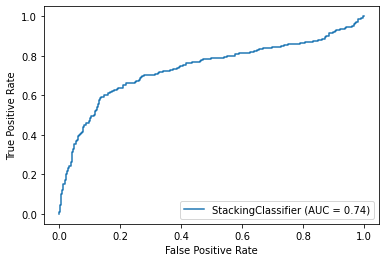

In [28]:
plot_roc_curve(model, X_val, y_val);

# Last Words:

We have seen cyberbully content and the damage that they deal. We should all grow more aware and responsible and help each other in times of need

# Sources
* [Starter Notebook](https://www.kaggle.com/kevinlwebb/bully-data-exploration)